# Gradient-based edge detection : Prewitt, Sobel, Kirsch, Roberts operators

A group of edge detection methods using an image intensity gradient - a measure of the intensity change over a specific area. Edges are often characterised by steep gradients. The gradient magnitude and direction at each pixel is computed by convolving the image with a collection of kernels that highlight the horizontal or vertical gradients. Higher gradient magnitudes indicate stronger edges. Various operators with different kernels are used to calculate the gradient magnitude. The Sum of the mask values must be equal to zero.

### Prewitt operator
Two 3x3 kernels:\
\
<img src="kernel_prewitt.png" width="320">

### Sobel operator
Two 3x3 kernels:\
\
<img src="kernel_sobel.png" width="320">




At each pixel, the gradient magnitude is obtained by combining all gradient approximations:\
\
<img src="prewitt_sobel_1.png" width="220">


The gradient direction is determined using:\
\
<img src="prewitt_sobel_2.png" width="220">





### Kirsch operator
Eight 3x3 kernels with different orientations (0°, 45°, 90°, etc.) to detect edges at multiple angles.\
\
<img src="kernel_kirsch.png" width="920">



The edge magnitude is calculated as the maximum magnitude across all directions:\
\
<img src="kirsch_1.png" width="350">



The edge direction is determined by the mask producing the maximum magnitude. 

### Roberts cross operator
two 2x2 kernels, used to detect edges running at 45° to the pixel grid:

The gradient magnitude is given by\
\
<img src="roberts_1.png" width="220">


The direction of the gradient is defined as: \
\
<img src="roberts_2.png" width="220">













# Implementation in Python


In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
import canny.utils.utils as utils
import cv2

In [2]:
def apply_operator_to_images(image_list, operator):
    processed_images = []
    for image in image_list:
        edges = operator(image)
        processed_images.append(edges)
    return processed_images


def show_edges(original_images, processed_images):
    
    fig, axes = plt.subplots(len(original_images), 2, figsize=(10, 10))

    for i, (image, processed_image) in enumerate(zip(original_images, processed_images)):
        axes[i][0].imshow(image, cmap='gray')
        axes[i][0].axis('off')
        axes[i][0].set_title('Original')
        axes[i][1].imshow(processed_image, cmap='gray')
        axes[i][1].axis('off')
        axes[i][1].set_title('Processed')



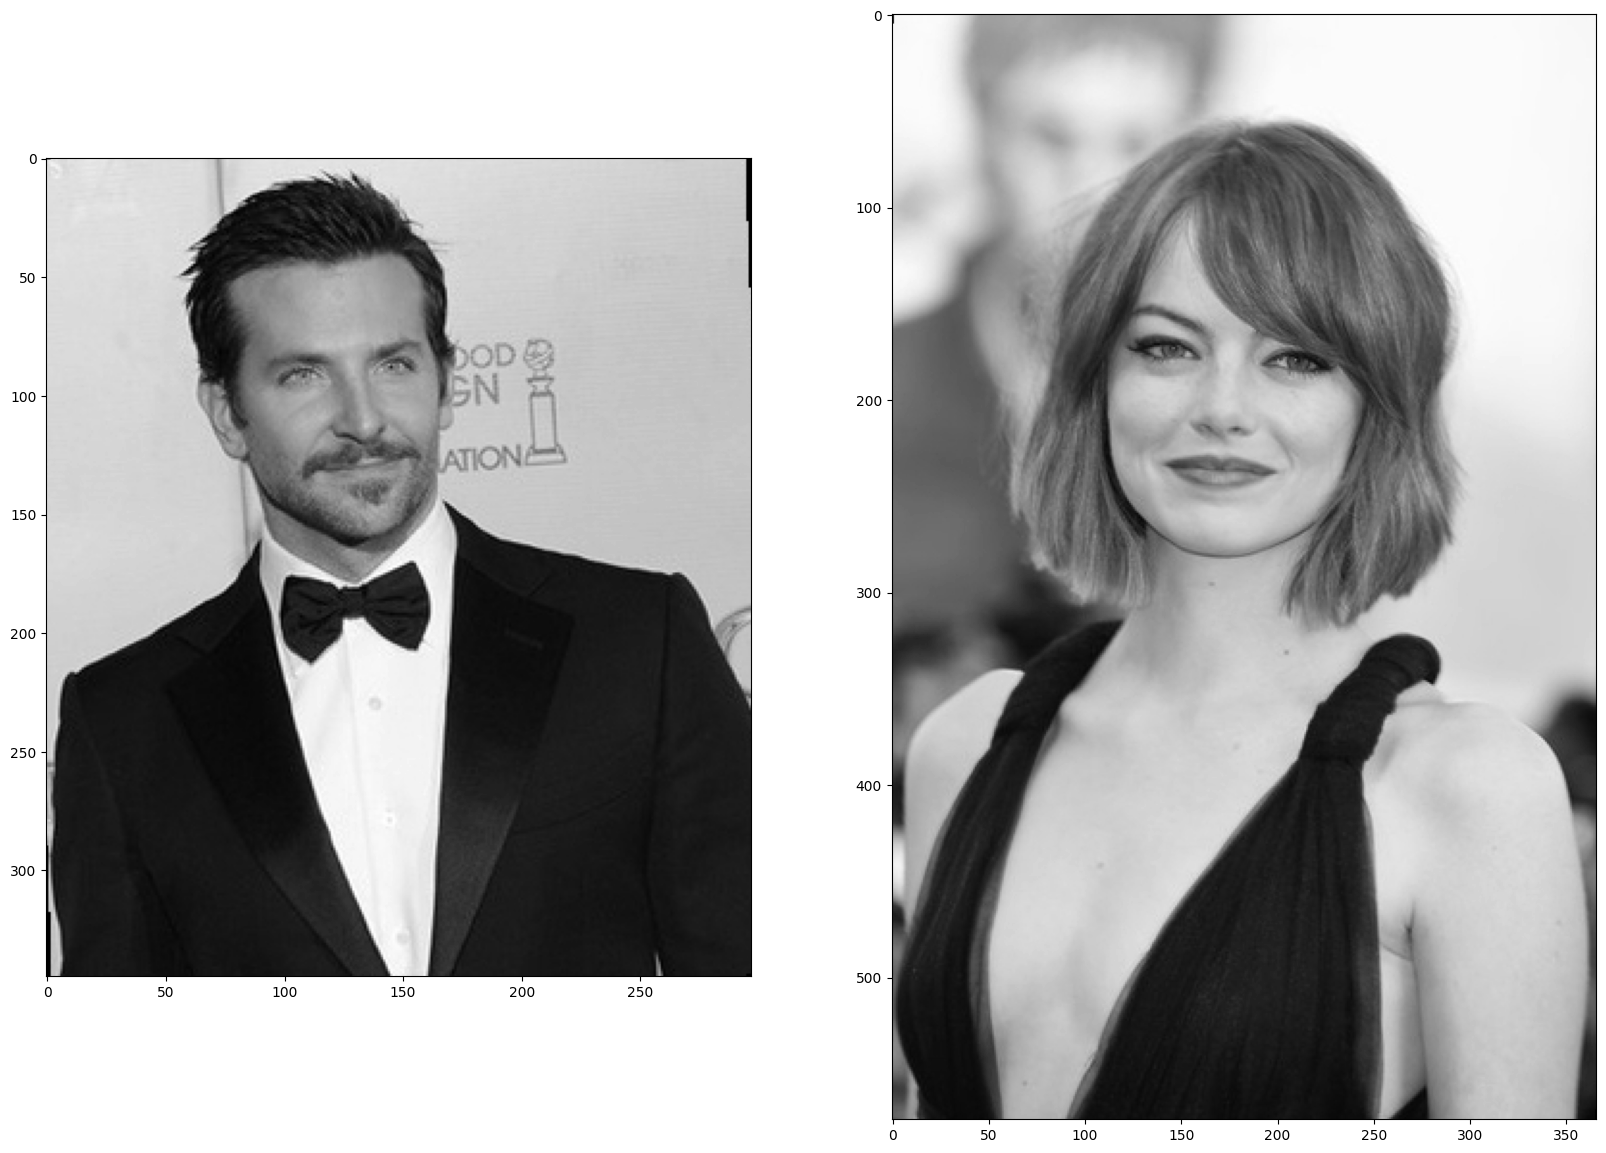

In [7]:
images = utils.load_data('../canny/faces_imgs')
utils.visualize(images, format="gray")

### Prewitt operator

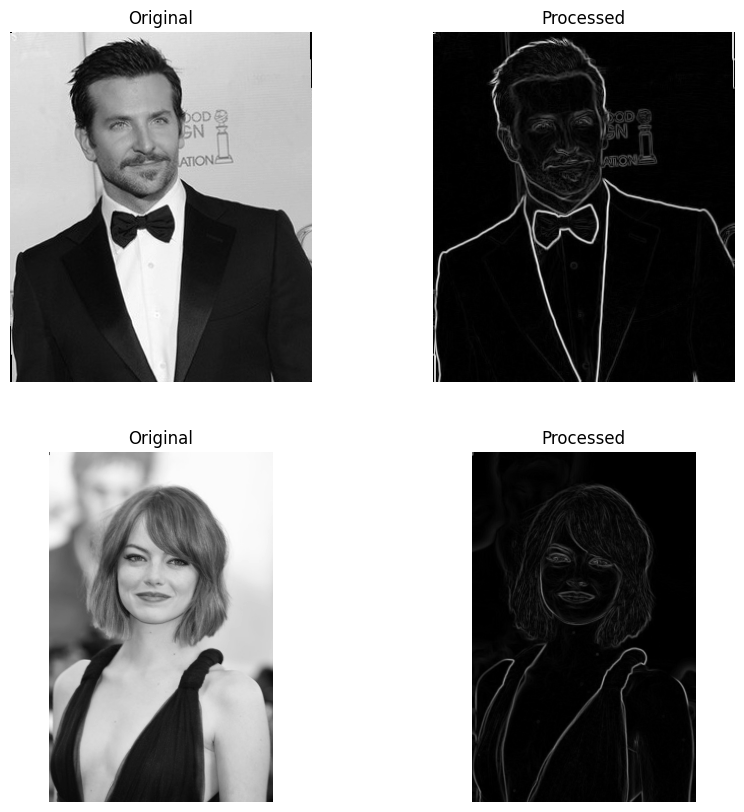

In [12]:
def prewitt_operator(image):
    
    # Define kernels 
    kernel_x = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])

    kernel_y = np.array([[-1, -1, -1],
                        [0, 0, 0],
                        [1, 1, 1]])

    # Apply kernels to the image
    gradient_x = cv2.filter2D(image, -1, kernel_x)
    gradient_y = cv2.filter2D(image, -1, kernel_y)

    # Compute magnitude of gradients
    magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)

    # Normalize magnitude to 0-255
    magnitude = (magnitude * 255 / np.max(magnitude)).astype(np.uint8)

    return magnitude

prewitt_results = apply_operator_to_imagehttps://www.youtube.com/watch?v=8sYCSW7S57Ys(images, prewitt_operator)
show_edges(images, prewitt_results)


### Sobel operator

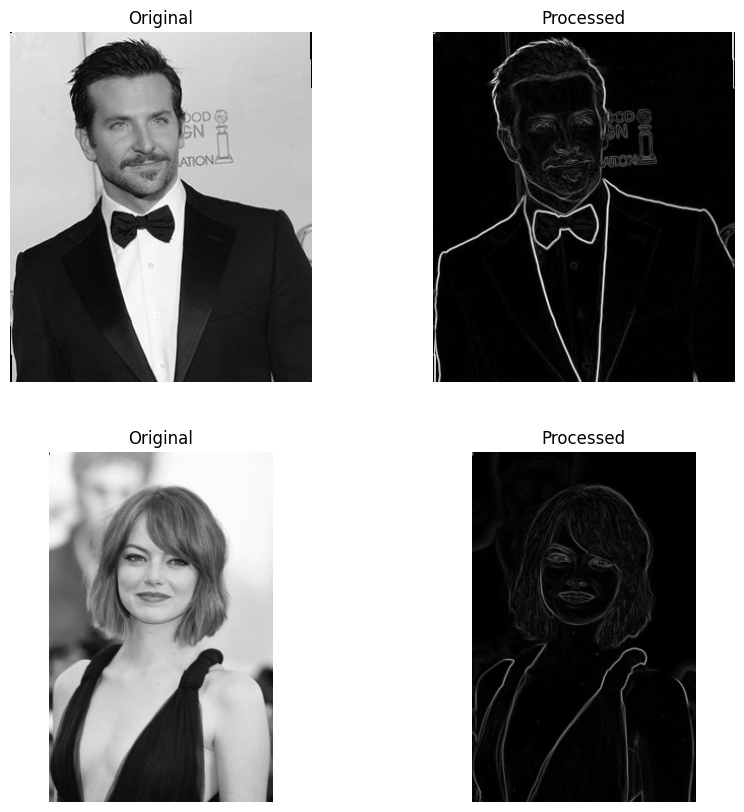

In [11]:
def sobel_operator(image):
    
    # Define kernels 
    kernel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    kernel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    # Apply kernels to the image
    gradient_x = cv2.filter2D(image, -1, kernel_x)
    gradient_y = cv2.filter2D(image, -1, kernel_y)

    # Compute magnitude of gradients
    magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)

    # Normalize magnitude to 0-255
    magnitude = (magnitude * 255 / np.max(magnitude)).astype(np.uint8)

    return magnitude

sobel_results = apply_operator_to_images(images, sobel_operator)
show_edges(images, sobel_results)


### Kirsch operator

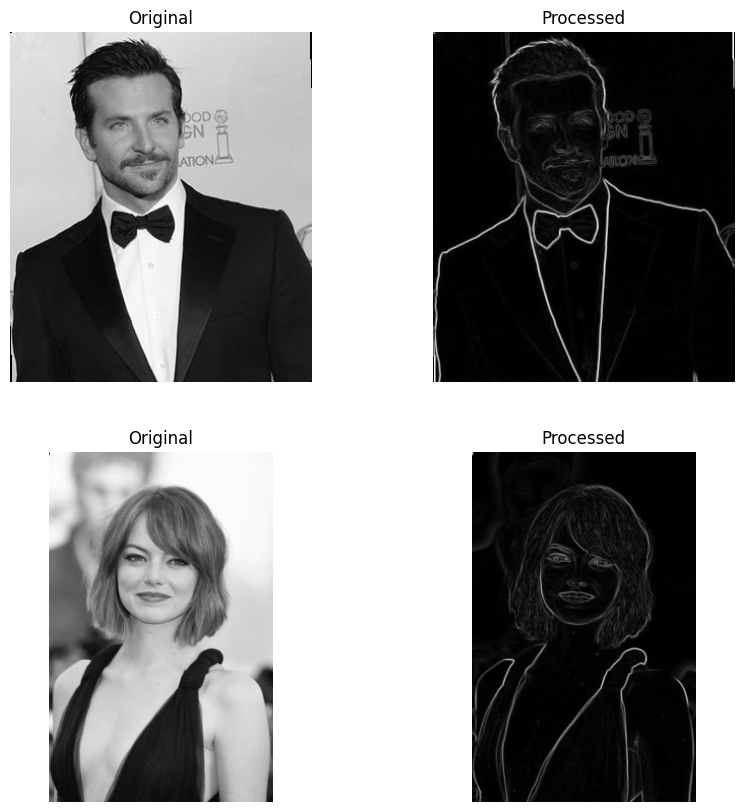

In [10]:
def kirsch_operator(image):

    # Define kernels 
    kernels = [
        np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]),
        np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),
        np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),
        np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]]),
        np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),
        np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),
        np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),
        np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]])
    ]

    # Apply kernels to the image
    grads = [cv2.filter2D(image, -1, kernel) for kernel in kernels]

    # Compute magnitude of gradients
    magnitude = np.max(grads, axis=0)

    # Normalize magnitude to 0-255
    magnitude = (magnitude * 255 / np.max(magnitude)).astype(np.uint8)

    return magnitude

kirsch_results = apply_operator_to_images(images, kirsch_operator)
show_edges(images, kirsch_results)


### Roberts cross operator

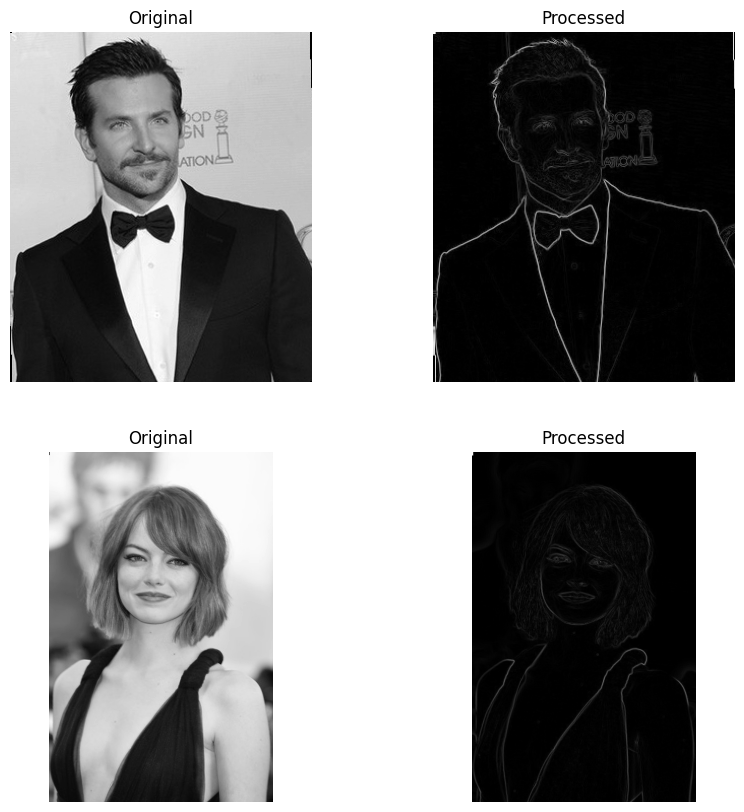

In [13]:
def roberts_cross_operator(image):
    
    # Define kernels
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    # Convolve the image with the kernels
    gradient_x = cv2.filter2D(image, -1, kernel_x)
    gradient_y = cv2.filter2D(image, -1, kernel_y)

    # Compute the magnitude of the gradient
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Normalize magnitude to 0-255
    magnitude = (magnitude * 255 / np.max(magnitude)).astype(np.uint8)

    return magnitude

roberts_results = apply_operator_to_images(images, roberts_cross_operator)
show_edges(images, roberts_results)


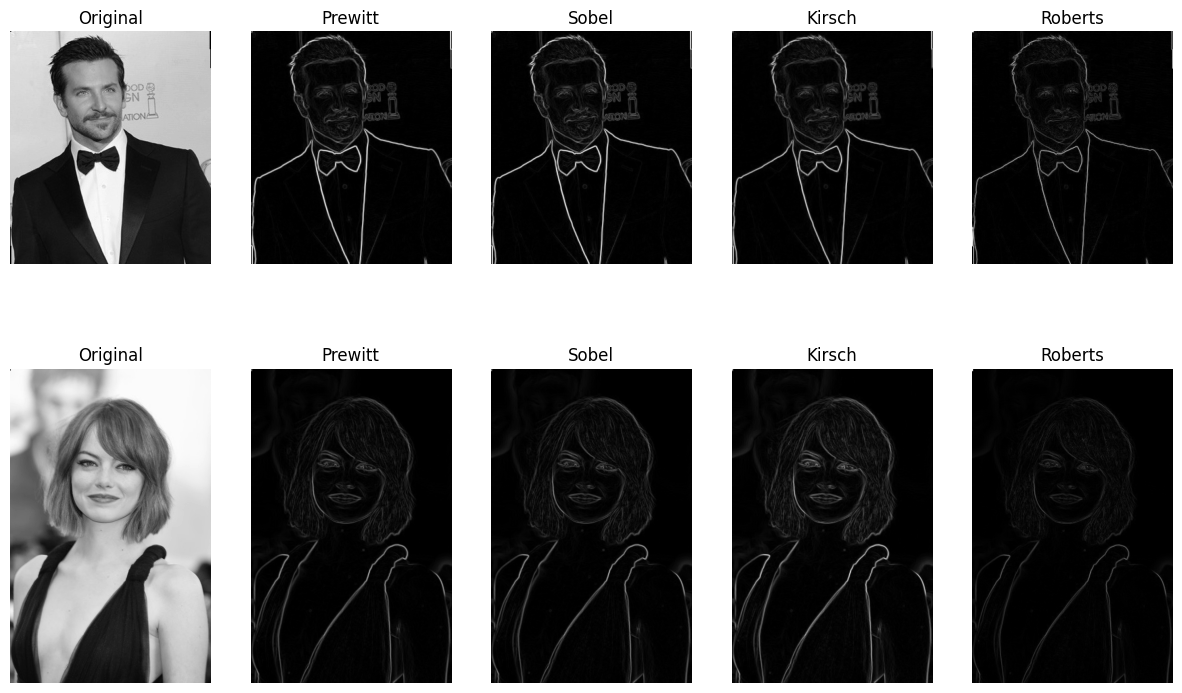

In [33]:
def show_edges_all(original_images, processed_images, processed_names):
    
    fig, axes = plt.subplots(len(original_images), len(processed_images)+1, figsize=(15, 9))

    for i, image in enumerate(images):
        axes[i][0].imshow(image, cmap='gray')
        axes[i][0].axis('off')
        axes[i][0].set_title('Original')
    for k, method in enumerate(processed_images):
        for i, processed_image in enumerate(method):
            axes[i][k+1].imshow(processed_image, cmap='gray')
            axes[i][k+1].axis('off')
            axes[i][k+1].set_title(processed_names[k])
            
show_edges_all(images, [prewitt_results, sobel_results, kirsch_results, roberts_results], ["Prewitt", "Sobel", "Kirsch", "Roberts"])